In [ ]:
import os
import datetime

In [2]:
print(os.getcwd())

C:\Users\Ali\OneDrive - Georgia Institute of Technology\25-5 Summer\CS 7643 - Deep Learning\_Project\mbari-mae\notebook


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

model_dict = {
    '2en1de': 'S2V-2L',
    '4en1de': 'S2V-4L',
    '6en1de': 'S2V-6L',}

In [52]:
from collections import defaultdict
model_dir = r'pretraining logs'
data_df = pd.DataFrame()

try:
    file_list = os.listdir(model_dir)
except FileNotFoundError:
    print(f"ERROR: Directory not found at '{model_dir}'")
    file_list = []

log_dict = defaultdict(list)

for filename in file_list:
    if not filename.endswith('.log'):
        continue

    model_key = next((key for key in model_dict if key in filename), None)

    if not model_key:
        print(f"Warning: Could not determine model for '{filename}'. Skipping.")
        continue
    filepath = os.path.join(model_dir, filename)

    with open(filepath) as f:
        for line in f:
            if '[valid][INFO]' in line:
                log_dict[model_key].append(line)
            if '[train][INFO]' in line:
                log_dict[model_key].append(line)




In [53]:
log_dict['2en1de']

['[2025-07-04 13:11:24,602][train][INFO] - {"epoch": 1, "train_loss": "18.572", "train_nll_loss": "0.05", "train_loss_recon": "0.666", "train_loss_info_nce": "11.903", "train_ppl": "1.04", "train_wps": "1384.9", "train_ups": "0.47", "train_wpb": "2956.8", "train_bsz": "385.8", "train_num_updates": "242", "train_lr": "6.05e-06", "train_gnorm": "25.133", "train_clip": "45", "train_loss_scale": "128", "train_train_wall": "508", "train_gb_free": "2.9", "train_wall": "533"}\n',
 '[2025-07-04 13:20:04,577][train][INFO] - {"epoch": 2, "train_loss": "11.768", "train_nll_loss": "0.032", "train_loss_recon": "0.283", "train_loss_info_nce": "8.932", "train_ppl": "1.02", "train_wps": "1376.1", "train_ups": "0.47", "train_wpb": "2956.8", "train_bsz": "385.8", "train_num_updates": "484", "train_lr": "1.21e-05", "train_gnorm": "2.522", "train_clip": "0", "train_loss_scale": "128", "train_train_wall": "515", "train_gb_free": "2.9", "train_wall": "1053"}\n',
 '[2025-07-04 13:49:14,794][train][INFO] - {"

In [54]:
len(log_dict['2en1de'])

155

In [57]:
import pandas as pd
import json
import re

dataframes = {}

log_pattern = re.compile(r"\[(.*?)\]\[(.*?)\]\[INFO\] - (\{.*\})")

for model_name, log_list in log_dict.items():
    parsed_data_for_model = []

    for log_entry in log_list:
        match = log_pattern.match(log_entry)
        if not match:
            continue

        datetime_str, log_type, json_str = match.groups()
        data_dict = json.loads(json_str)

        data_dict['datetime'] = datetime_str
        data_dict['type'] = log_type

        parsed_data_for_model.append(data_dict)

    if not parsed_data_for_model:
        continue

    df = pd.DataFrame(parsed_data_for_model)

    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S,%f')

    id_cols = ['datetime', 'type']
    metric_cols = [col for col in df.columns if col not in id_cols]
    df = df[id_cols + sorted(metric_cols)]

    for col in metric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    dataframes[model_name] = df
    globals()[f'df_{model_name}'] = df

print(f"DataFrames created for models: {list(dataframes.keys())}\n")

if dataframes:
    first_model_name = list(dataframes.keys())[0]
    print(f"--- Head of DataFrame for '{first_model_name}' ---")
    print(dataframes[first_model_name].head())

DataFrames created for models: ['2en1de', '4en1de', '6en1de']

--- Head of DataFrame for '2en1de' ---
                 datetime   type  epoch  train_bsz  train_clip  train_gb_free  \
0 2025-07-04 13:11:24.602  train      1      385.8        45.0            2.9   
1 2025-07-04 13:20:04.577  train      2      385.8         0.0            2.9   
2 2025-07-04 13:49:14.794  train      3      416.8         4.0            0.0   
3 2025-07-04 13:59:20.476  train      4      385.8         0.4            2.9   
4 2025-07-04 14:10:43.542  valid      5        NaN         NaN            NaN   

   train_gnorm  train_loss  train_loss_info_nce  train_loss_recon  ...  \
0       25.133      18.572               11.903             0.666  ...   
1        2.522      11.768                8.932             0.283  ...   
2        3.783      10.908                8.658             0.225  ...   
3        3.564      10.726                8.562             0.216  ...   
4          NaN         NaN               

In [60]:
df_2en1de[df_2en1de['type'] == 'valid'].dropna(axis=1)

,datetime,type,epoch,valid_bsz,valid_loss,valid_loss_info_nce,valid_loss_recon,valid_nll_loss,valid_num_updates,valid_ppl,valid_wpb,valid_wps
4,2025-07-04 14:10:43.542,valid,5,48.0,10.301,8.397,0.190,0.028,1192.0,1.02,368.6,1615.3
10,2025-07-04 15:03:17.934,valid,10,48.0,9.814,8.157,0.166,0.027,2402.0,1.02,368.6,1562.9
16,2025-07-04 17:17:03.387,valid,15,48.0,8.976,7.596,0.138,0.024,3612.0,1.02,368.6,2698.6
22,2025-07-04 18:08:09.546,valid,20,48.0,7.865,6.638,0.123,0.021,4822.0,1.01,368.6,1712.8
28,2025-07-04 18:59:47.721,valid,25,48.0,6.385,5.244,0.114,0.017,6032.0,1.01,368.6,1828.7
34,2025-07-04 19:51:15.030,valid,30,48.0,5.884,4.815,0.107,0.016,7242.0,1.01,368.6,1879.4
40,2025-07-04 20:42:46.414,valid,35,48.0,5.686,4.617,0.107,0.015,8452.0,1.01,368.6,1794.6
46,2025-07-04 21:26:17.222,valid,40,48.0,5.469,4.449,0.102,0.015,9662.0,1.01,368.6,2843.8
49,2025-07-04 21:38:52.136,valid,42,48.0,5.437,4.409,0.103,0.015,10000.0,1.01,368.6,3093.7
53,2025-07-04 22:12:38.746,valid,45,48.0,5.345,4.324,0.102,0.015,10872.0,1.01,368.6,1850.7


In [61]:
df_2en1de[df_2en1de['type'] == 'train'].dropna(axis=1)

,datetime,type,epoch,train_bsz,train_clip,train_gb_free,train_gnorm,train_loss,train_loss_info_nce,train_loss_recon,train_loss_scale,train_lr,train_nll_loss,train_num_updates,train_ppl,train_train_wall,train_ups,train_wall,train_wpb,train_wps
0,2025-07-04 13:11:24.602,train,1,385.8,45.0,2.9,25.133,18.572,11.903,0.666,128.0,0.000006,0.050,242.0,1.04,508.0,0.47,533.0,2956.8,1384.9
1,2025-07-04 13:20:04.577,train,2,385.8,0.0,2.9,2.522,11.768,8.932,0.283,128.0,0.000012,0.032,484.0,1.02,515.0,0.47,1053.0,2956.8,1376.1
2,2025-07-04 13:49:14.794,train,3,416.8,4.0,0.0,3.783,10.908,8.658,0.225,128.0,0.000018,0.029,708.0,1.02,1704.0,0.13,1725.0,1475.5,193.9
3,2025-07-04 13:59:20.476,train,4,385.8,0.4,2.9,3.564,10.726,8.562,0.216,128.0,0.000024,0.029,950.0,1.02,553.0,0.43,577.0,2956.8,1282.3
5,2025-07-04 14:10:47.888,train,5,385.8,3.7,2.9,4.128,10.533,8.496,0.204,128.0,0.000030,0.028,1192.0,1.02,610.0,0.35,1264.0,2956.8,1041.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2025-07-05 11:00:57.288,train,122,385.8,0.0,2.9,0.891,5.102,4.100,0.100,65536.0,0.000045,0.014,29502.0,1.01,504.0,0.48,63466.0,2956.8,1404.8
149,2025-07-05 11:11:10.109,train,123,385.8,0.0,2.9,0.947,5.107,4.104,0.100,65536.0,0.000044,0.014,29744.0,1.01,607.0,0.39,64079.0,2956.8,1167.6
150,2025-07-05 11:21:18.703,train,124,385.8,0.0,2.9,0.914,5.108,4.105,0.100,65536.0,0.000044,0.014,29986.0,1.01,601.0,0.40,64687.0,2956.8,1175.7
153,2025-07-05 11:31:47.485,train,125,385.8,0.0,2.9,0.920,5.103,4.100,0.100,65536.0,0.000043,0.014,30228.0,1.01,548.0,0.38,65316.0,2956.8,1138.1


In [68]:
for d in dataframes:
    df = dataframes[d]
    types = ['train', 'valid']
    for type in types:
        df[df['type'] == type].dropna(axis=1)


Index(['datetime', 'type', 'epoch', 'train_bsz', 'train_clip', 'train_gb_free',
       'train_gnorm', 'train_loss', 'train_loss_info_nce', 'train_loss_recon',
       'train_loss_scale', 'train_lr', 'train_nll_loss', 'train_num_updates',
       'train_ppl', 'train_train_wall', 'train_ups', 'train_wall', 'train_wpb',
       'train_wps', 'valid_best_loss', 'valid_bsz', 'valid_loss',
       'valid_loss_info_nce', 'valid_loss_recon', 'valid_nll_loss',
       'valid_num_updates', 'valid_ppl', 'valid_wpb', 'valid_wps'],
      dtype='object')
Index(['datetime', 'type', 'epoch', 'train_bsz', 'train_clip', 'train_gb_free',
       'train_gnorm', 'train_loss', 'train_loss_info_nce', 'train_loss_recon',
       'train_loss_scale', 'train_lr', 'train_nll_loss', 'train_num_updates',
       'train_ppl', 'train_train_wall', 'train_ups', 'train_wall', 'train_wpb',
       'train_wps', 'valid_best_loss', 'valid_bsz', 'valid_loss',
       'valid_loss_info_nce', 'valid_loss_recon', 'valid_nll_loss',
       '

--- Generating plots for model: 2en1de ---


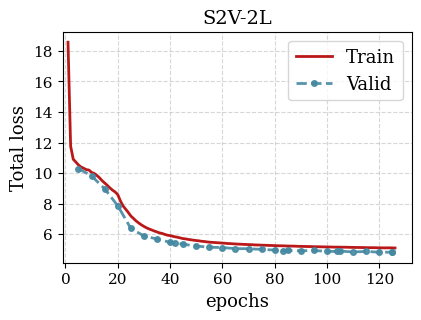

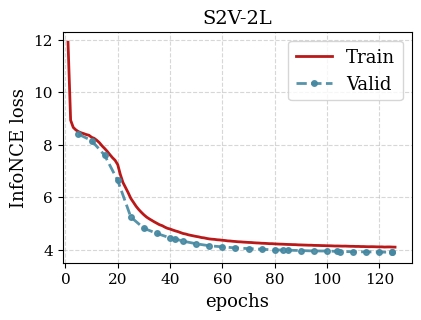

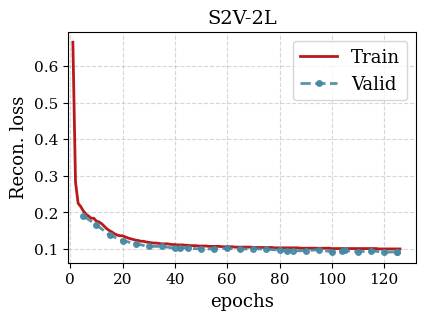

--- Generating plots for model: 4en1de ---


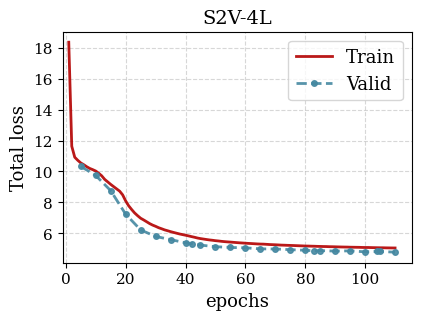

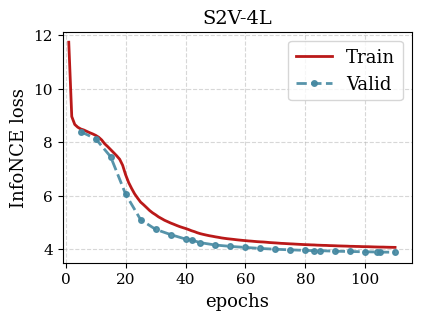

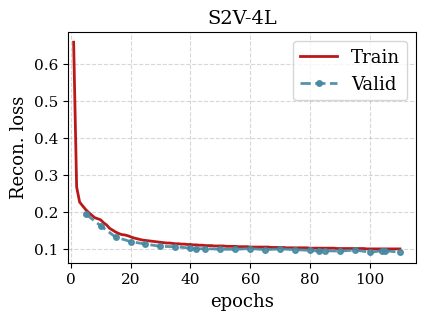

--- Generating plots for model: 6en1de ---


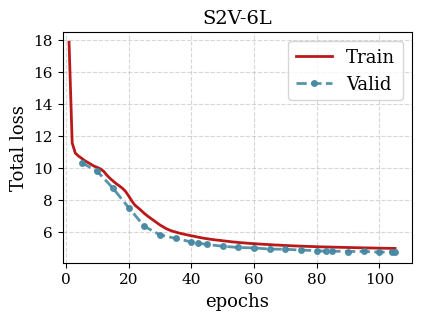

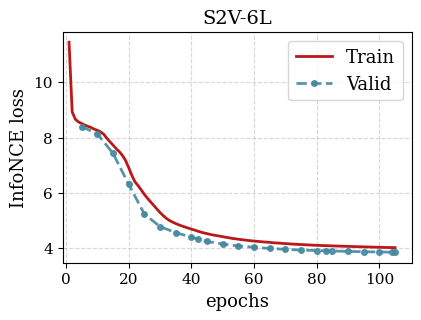

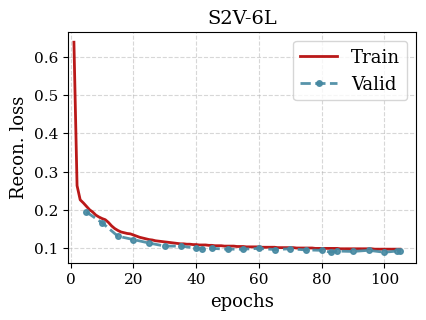

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import os

def _plot_single_loss_curve(df, model_name, loss_type='loss', save_plot=False, model_dir='.'):

    font_s = {'family': 'serif', 'weight': 'normal', 'size': 13}
    font_l = {'family': 'serif', 'weight': 'normal', 'size': 14}
    plt.figure(figsize=[4.5,3])

    train_df = df[df['type'] == 'train'].dropna(axis=1, how='all')
    valid_df = df[df['type'] == 'valid'].dropna(axis=1, how='all')
    train_col = f'train_{loss_type}'
    valid_col = f'valid_{loss_type}'
    max_epoch = 0

    if train_col in train_df.columns and not train_df.empty:
        plt.plot(train_df['epoch'], train_df[train_col],
                 label="Train", color='#b30000', linestyle='-', lw=2, alpha=0.9)
        max_epoch = max(max_epoch, train_df['epoch'].max())

    if valid_col in valid_df.columns and not valid_df.empty:
        plt.plot(valid_df['epoch'], valid_df[valid_col],
                 label="Valid", color='#4588a1', linestyle='--', marker='o', ms=4, lw=2, alpha=0.9)
        max_epoch = max(max_epoch, valid_df['epoch'].max())

    if max_epoch > 0:
        plt.legend(prop=font_s, loc='upper right')
        plt.xlabel('epochs', fontdict=font_s)
        if loss_type == 'loss':
            plt.ylabel('Total loss', fontdict=font_s)
        elif loss_type == 'loss_info_nce':
            plt.ylabel(f'InfoNCE loss', fontdict=font_s)
        else:
            plt.ylabel(f'Recon. loss', fontdict=font_s)


        plt.title(f'{model_dict[model_name]}', fontdict=font_l)

        plt.xticks(fontname="serif", fontsize=11)
        plt.yticks(fontname="serif", fontsize=11)

        plt.xlim(-1, max_epoch * 1.05)
        plt.grid(True, linestyle='--', alpha=0.5)

        if save_plot:
            output_dir = os.path.join(model_dir, 'pretraining_plots')
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(os.path.join(output_dir, f'{model_name}-{loss_type}.pdf'),
                        bbox_inches='tight', pad_inches=0)
        plt.show()
    else:
        plt.close()


def plot_all_model_losses(dataframes, save_plots=False, model_dir='.'):

    for model_name, df in dataframes.items():
        print(f"--- Generating plots for model: {model_name} ---")
        _plot_single_loss_curve(df, model_name, 'loss', save_plots, model_dir)
        _plot_single_loss_curve(df, model_name, 'loss_info_nce', save_plots, model_dir)
        _plot_single_loss_curve(df, model_name, 'loss_recon', save_plots, model_dir)

plot_all_model_losses(dataframes, save_plots=False)


In [105]:
for model_name in dataframes:

    if model_name == '6en1de':
        twentyfifth_timestamp = dataframes[model_name]['datetime'][25]
    else:
        first_timestamp = dataframes[model_name]['datetime'].min()

    last_timestamp = dataframes[model_name]['datetime'].max()

    epochs = dataframes[model_name]['epoch'].max()

    if model_name == '6en1de':
        time_difference = (epochs * (last_timestamp - twentyfifth_timestamp).total_seconds()) / (3600 * (epochs - 25))
    else:
        time_difference = (last_timestamp - first_timestamp).total_seconds() / 3600

    batch_size = dataframes[model_name]['train_bsz'].mean()


    print(f'{model_dict[model_name]} training time: {time_difference:.2f} hours. Number of epochs: {epochs}. Effective train batch size: {batch_size:.2f}')

S2V-2L training time: 22.49 hours. Number of epochs: 126. Effective train batch size: 386.05
S2V-4L training time: 19.28 hours. Number of epochs: 110. Effective train batch size: 385.80
S2V-6L training time: 21.07 hours. Number of epochs: 105. Effective train batch size: 385.80
